In [1]:
# load the dataset from kaggle

import kagglehub

# Download latest version
path = kagglehub.dataset_download("bhavikjikadara/dog-and-cat-classification-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Horo\.cache\kagglehub\datasets\bhavikjikadara\dog-and-cat-classification-dataset\versions\1


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.applications import VGG16
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import os
from PIL import Image
import matplotlib.pyplot as plt

In [5]:
def load_images_from_folder(folder, label, img_size=(64,64), max_images=None):
    images, labels = [], []
    for i, filename in enumerate(os.listdir(folder)):
        if filename.endswith('.jpg'):
            try:
                img = Image.open(os.path.join(folder, filename)).convert('RGB')
                img = img.resize(img_size)
                images.append(np.array(img))
                labels.append(label)
            except:
                continue
        if max_images and i >= max_images-1:
            break
    return images, labels

img_size = (128, 128)

cat_images, cat_labels = load_images_from_folder(f'{path}/PetImages/Cat', 0, img_size=img_size)
dog_images, dog_labels = load_images_from_folder(f'{path}/PetImages/Dog', 1, img_size=img_size)

X = np.array(cat_images + dog_images)
y = np.array(cat_labels + dog_labels)

d:\Alex\softuri\anaconda3\Lib\site-packages\PIL\TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))


In [6]:
print(X.shape)
print(y.shape)

(24998, 128, 128, 3)
(24998,)


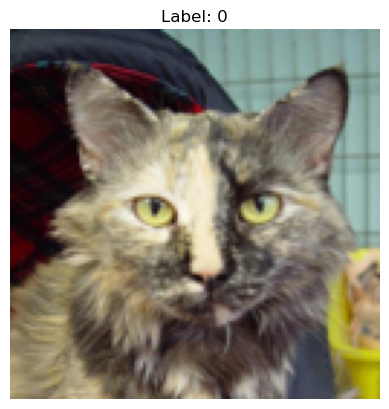

In [7]:
plt.imshow(X[2])
plt.title(f"Label: {y[2]}")
plt.axis('off')
plt.show()

In [8]:
#Normalize images from [0,255] to [0, 1]
X = X.astype('float32') / 255.0 

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Build the CNN model
model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu',kernel_initializer='he_uniform'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

for layer in base_model.layers:
    layer.trainable = False

opt = SGD(learning_rate=0.001, momentum=0.9)

model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the model
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation Accuracy: {val_accuracy}')


# Save the trained model to disk
model.save('cat_dog_classifier_VGG16.h5')

Epoch 1/50
 35/625 ━━━━━━━━━━━━━━━━━━━━ 15:13 2s/step - accuracy: 0.5741 - loss: 0.7238

KeyboardInterrupt: 